# Feature Engineering & Selection

## Data Exploration & Analysis

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Load datasets
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [4]:
train_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
# Check for missing values in train set
print("\nMissing Values:")
print(train_set.isnull().sum())


Missing Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
# Summary statistics for numerical variables
print("\nSummary Statistics (Numerical):")
print(train_set.describe())

# Summary statistics for categorical variables
print("\nSummary Statistics (Categorical):")
print(train_set.describe(include=['object']))


Summary Statistics (Numerical):
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Summary Statistics (Categorical):
         Loan_ID Gender Married Dependen

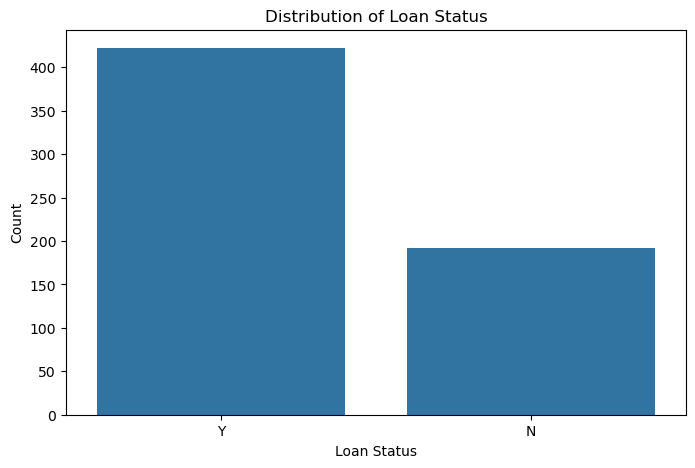

In [8]:
# --- Visualize Distributions ---

# 1. Target Variable: Loan_Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=train_set)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

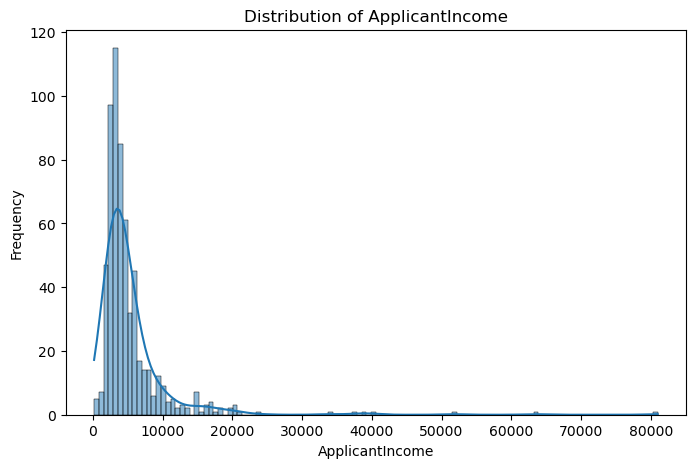

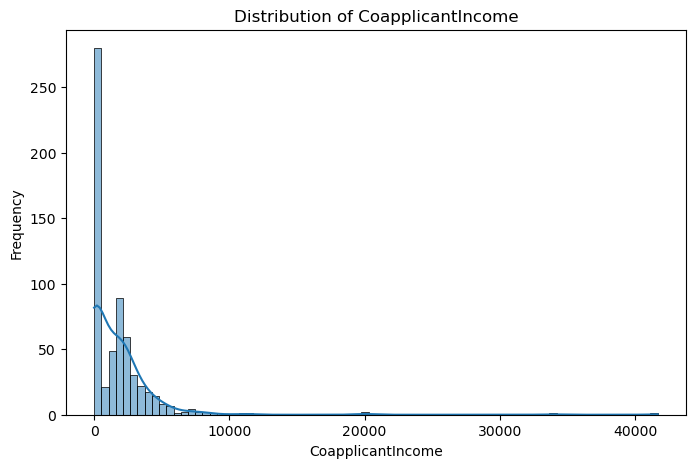

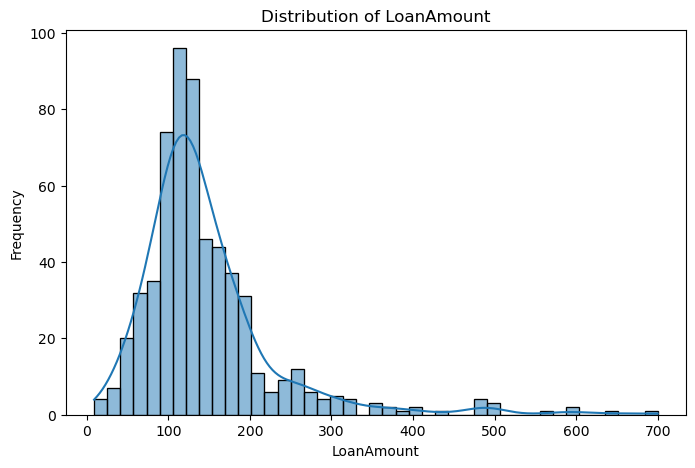

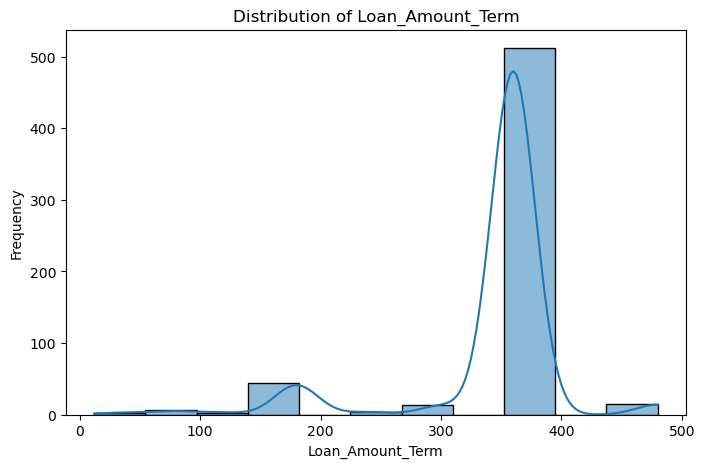

In [9]:
# 2. Numerical Variables: Histograms
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_set[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

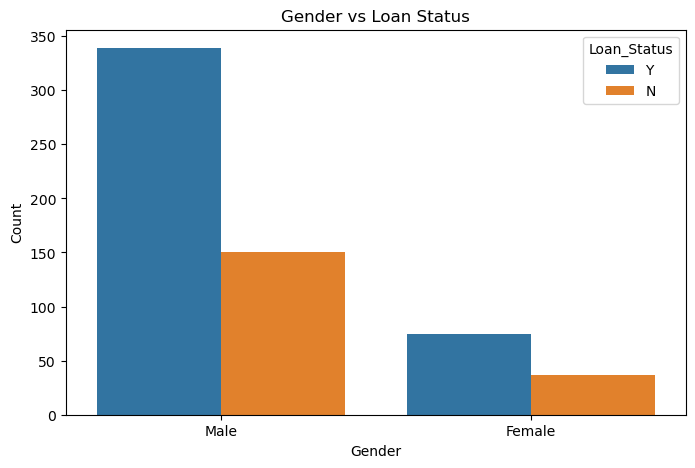

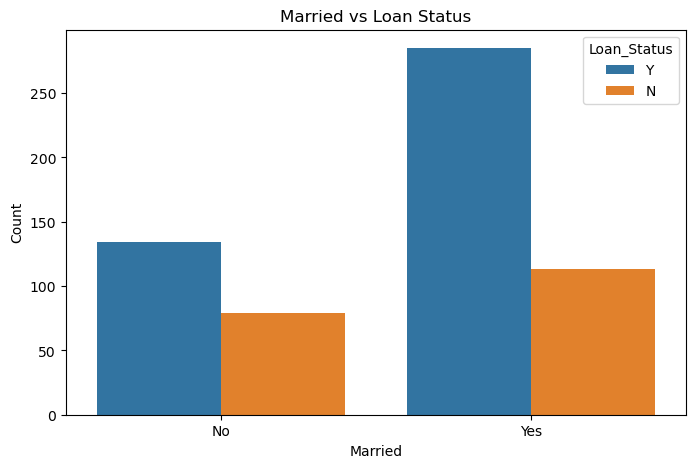

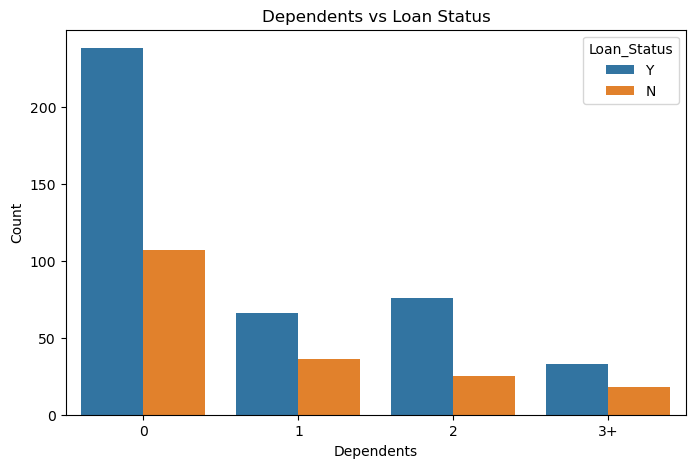

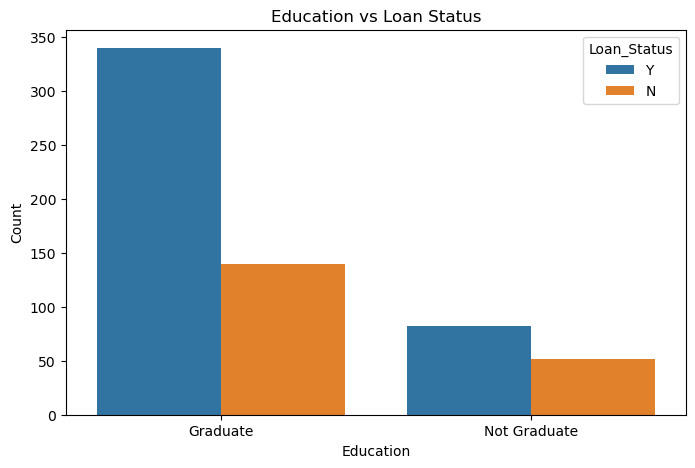

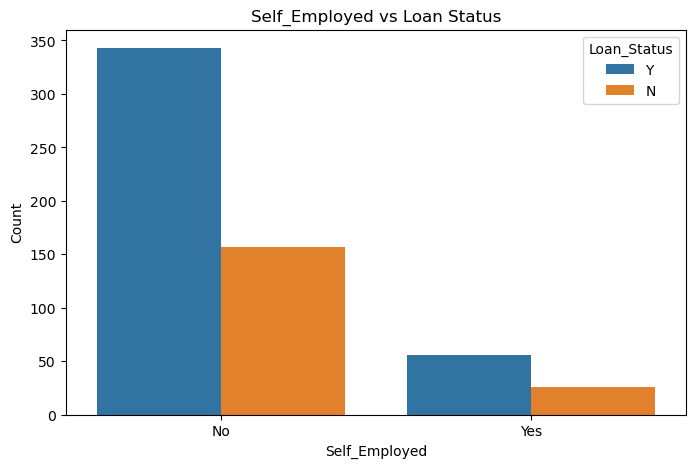

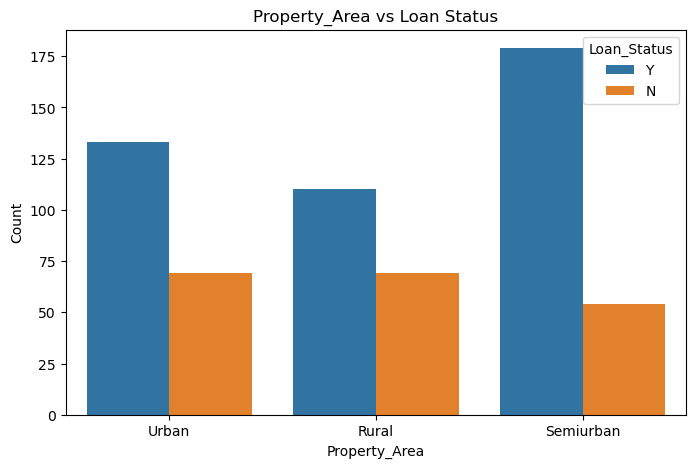

In [10]:
# 3. Categorical Variables: Count Plots
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=train_set)
    plt.title(f'{col} vs Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

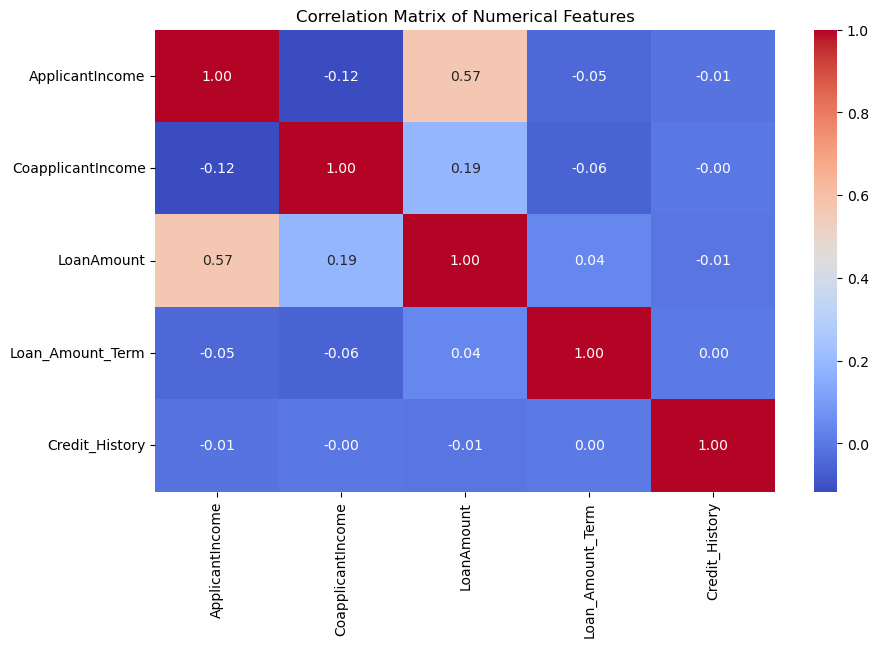

In [11]:
# --- Correlation Analysis ---

# Correlation matrix for numerical variables
plt.figure(figsize=(10, 6))
corr_matrix = train_set[numerical_cols + ['Credit_History']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

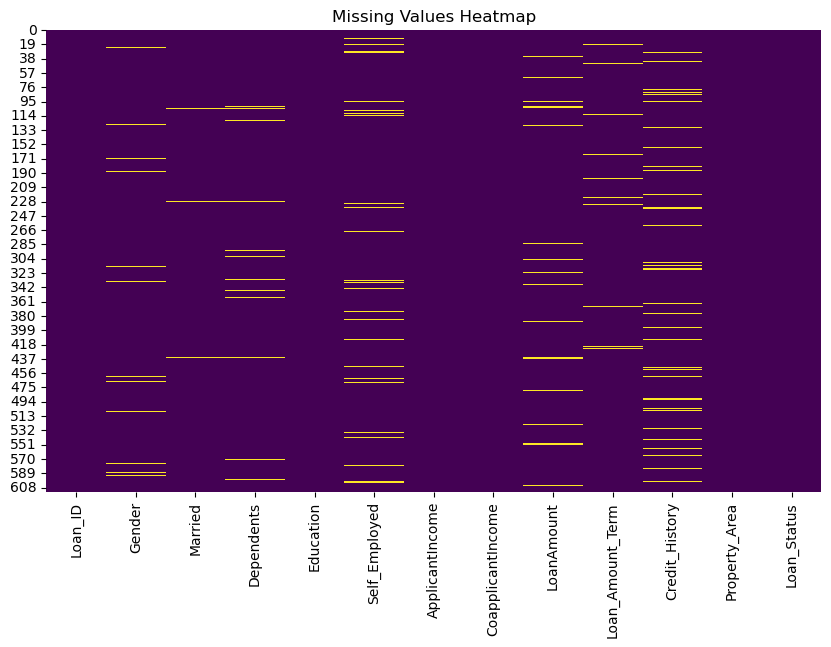

In [12]:
# --- Missing Values Analysis ---

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_set.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

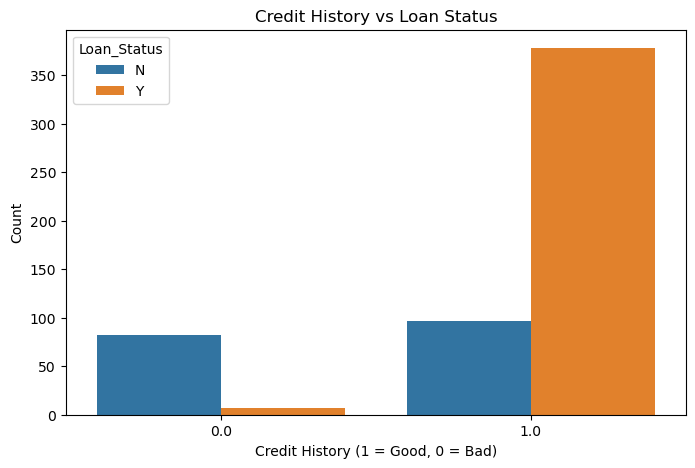

In [13]:
# --- Potential Insights ---

# Loan Status by Credit History (since Credit_History seems important)
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_set)
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History (1 = Good, 0 = Bad)')
plt.ylabel('Count')
plt.show()

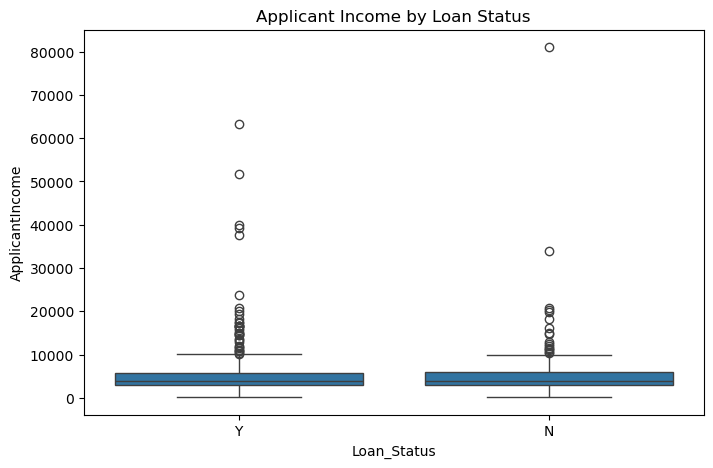

In [14]:
# Boxplot for ApplicantIncome by Loan_Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_set)
plt.title('Applicant Income by Loan Status')
plt.show()

## Feature Engineering

In [15]:
# --- Step 1: Handle Missing Values ---

# Function to display missing value percentages
def missing_values_summary(df):
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    return pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})

print("Missing Values Summary:")
print(missing_values_summary(train_set))

Missing Values Summary:
                   Missing Values  Percentage
Loan_ID                         0    0.000000
Gender                         13    2.117264
Married                         3    0.488599
Dependents                     15    2.442997
Education                       0    0.000000
Self_Employed                  32    5.211726
ApplicantIncome                 0    0.000000
CoapplicantIncome               0    0.000000
LoanAmount                     22    3.583062
Loan_Amount_Term               14    2.280130
Credit_History                 50    8.143322
Property_Area                   0    0.000000
Loan_Status                     0    0.000000


In [16]:
# Impute missing values
# Categorical variables: Use mode
train_set['Gender'] = train_set['Gender'].fillna(train_set['Gender'].mode()[0])
train_set['Married'] = train_set['Married'].fillna(train_set['Married'].mode()[0])
train_set['Dependents'] = train_set['Dependents'].fillna(train_set['Dependents'].mode()[0])
train_set['Self_Employed'] = train_set['Self_Employed'].fillna(train_set['Self_Employed'].mode()[0])

In [17]:
# Numerical variables: Use median (robust to outliers)
train_set['LoanAmount'] = train_set['LoanAmount'].fillna(train_set['LoanAmount'].median())
train_set['Loan_Amount_Term'] = train_set['Loan_Amount_Term'].fillna(train_set['Loan_Amount_Term'].median())
train_set['Credit_History'] = train_set['Credit_History'].fillna(train_set['Credit_History'].mode()[0])

In [18]:
# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(missing_values_summary(train_set))


Missing Values After Imputation:
                   Missing Values  Percentage
Loan_ID                         0         0.0
Gender                          0         0.0
Married                         0         0.0
Dependents                      0         0.0
Education                       0         0.0
Self_Employed                   0         0.0
ApplicantIncome                 0         0.0
CoapplicantIncome               0         0.0
LoanAmount                      0         0.0
Loan_Amount_Term                0         0.0
Credit_History                  0         0.0
Property_Area                   0         0.0
Loan_Status                     0         0.0


In [19]:
# --- Step 2: Feature Transformations ---

# Log transformation for skewed numerical features
# ApplicantIncome and CoapplicantIncome are often right-skewed
train_set['Log_ApplicantIncome'] = np.log1p(train_set['ApplicantIncome'])
train_set['Log_CoapplicantIncome'] = np.log1p(train_set['CoapplicantIncome'])
train_set['Log_LoanAmount'] = np.log1p(train_set['LoanAmount'])

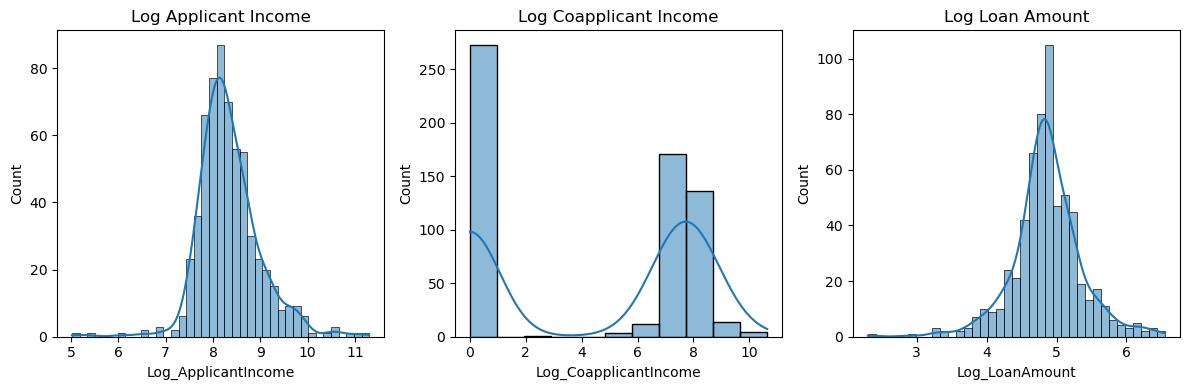

In [20]:
# Visualize transformations
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(train_set['Log_ApplicantIncome'], kde=True)
plt.title('Log Applicant Income')
plt.subplot(1, 3, 2)
sns.histplot(train_set['Log_CoapplicantIncome'], kde=True)
plt.title('Log Coapplicant Income')
plt.subplot(1, 3, 3)
sns.histplot(train_set['Log_LoanAmount'], kde=True)
plt.title('Log Loan Amount')
plt.tight_layout()
plt.show()

In [21]:
# --- Step 3: Feature Aggregations ---

# Create total income feature
train_set['Total_Income'] = train_set['ApplicantIncome'] + train_set['CoapplicantIncome']
train_set['Log_Total_Income'] = np.log1p(train_set['Total_Income'])

In [22]:
# Create EMI (Equated Monthly Installment) approximation
# EMI = LoanAmount / Loan_Amount_Term (simplified)
train_set['EMI'] = train_set['LoanAmount'] / train_set['Loan_Amount_Term']

In [23]:
# Create Debt-to-Income Ratio
train_set['Debt_Income_Ratio'] = train_set['LoanAmount'] / train_set['Total_Income']

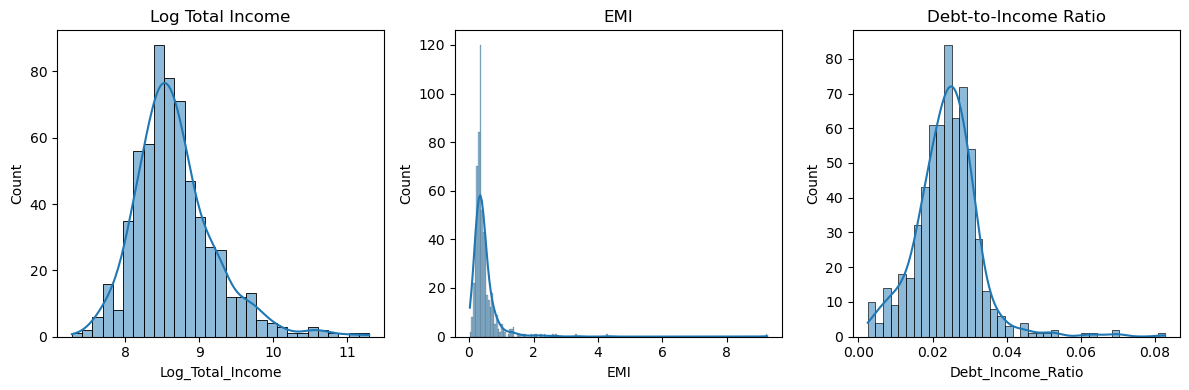

In [24]:
# Visualize new features
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(train_set['Log_Total_Income'], kde=True)
plt.title('Log Total Income')
plt.subplot(1, 3, 2)
sns.histplot(train_set['EMI'], kde=True)
plt.title('EMI')
plt.subplot(1, 3, 3)
sns.histplot(train_set['Debt_Income_Ratio'], kde=True)
plt.title('Debt-to-Income Ratio')
plt.tight_layout()
plt.show()

In [25]:
# --- Step 4: Categorical Encoding ---

# Label encode binary categorical variables
le = LabelEncoder()
train_set['Gender_Encoded'] = le.fit_transform(train_set['Gender'])
train_set['Married_Encoded'] = le.fit_transform(train_set['Married'])
train_set['Education_Encoded'] = le.fit_transform(train_set['Education'])
train_set['Self_Employed_Encoded'] = le.fit_transform(train_set['Self_Employed'])

In [26]:
# One-hot encode multi-class categorical variables
train_set = pd.get_dummies(train_set, columns=['Dependents', 'Property_Area'], drop_first=True)

In [27]:
# Label encode target variable Loan_Status
train_set['Loan_Status_Encoded'] = le.fit_transform(train_set['Loan_Status'])

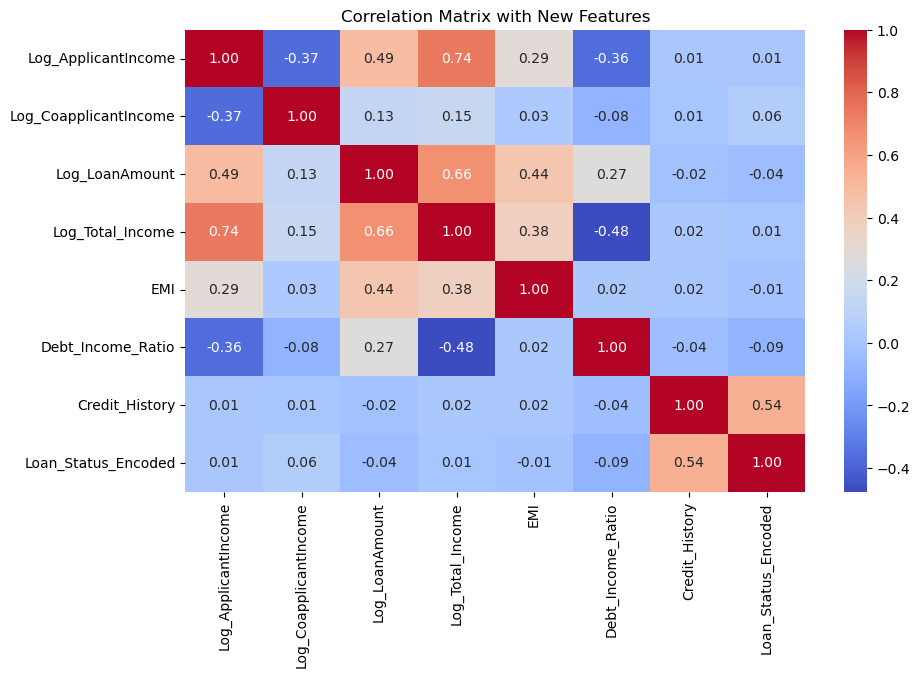

In [28]:
# --- Step 5: Feature Selection (Basic) ---

# Correlation analysis with encoded target
numerical_features = ['Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_LoanAmount',
                      'Log_Total_Income', 'EMI', 'Debt_Income_Ratio', 'Credit_History']
plt.figure(figsize=(10, 6))
corr_matrix = train_set[numerical_features + ['Loan_Status_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with New Features')
plt.show()

In [29]:
# Display final dataset columns
print("\nFinal Dataset Columns:")
print(train_set.columns)


Final Dataset Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_LoanAmount',
       'Total_Income', 'Log_Total_Income', 'EMI', 'Debt_Income_Ratio',
       'Gender_Encoded', 'Married_Encoded', 'Education_Encoded',
       'Self_Employed_Encoded', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Encoded'],
      dtype='object')


## Feature Selection

In [30]:
# Define features and target
X = train_set.drop(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Loan_Status_Encoded'], axis=1)
y = train_set['Loan_Status_Encoded']

In [31]:
# --- Step 1: Statistical Tests ---

# 1.1 Chi-squared test for categorical features
categorical_features = ['Gender_Encoded', 'Married_Encoded', 'Education_Encoded', 
                        'Self_Employed_Encoded', 'Dependents_1', 'Dependents_2', 
                        'Dependents_3+', 'Property_Area_Semiurban', 'Property_Area_Urban', 
                        'Credit_History']
X_categorical = X[categorical_features]

chi2_scores, p_values = chi2(X_categorical, y)
chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print("Chi-squared Test Results for Categorical Features:")
print(chi2_results)

Chi-squared Test Results for Categorical Features:
                   Feature  Chi2 Score       P-value
9           Credit_History   26.005877  3.403796e-07
7  Property_Area_Semiurban    7.103093  7.695104e-03
2        Education_Encoded    3.540502  5.988732e-02
5             Dependents_2    1.996446  1.576685e-01
1          Married_Encoded    1.782425  1.818518e-01
8      Property_Area_Urban    0.783946  3.759370e-01
4             Dependents_1    0.768400  3.807125e-01
6            Dependents_3+    0.384200  5.353641e-01
0           Gender_Encoded    0.036234  8.490324e-01
3    Self_Employed_Encoded    0.007285  9.319823e-01


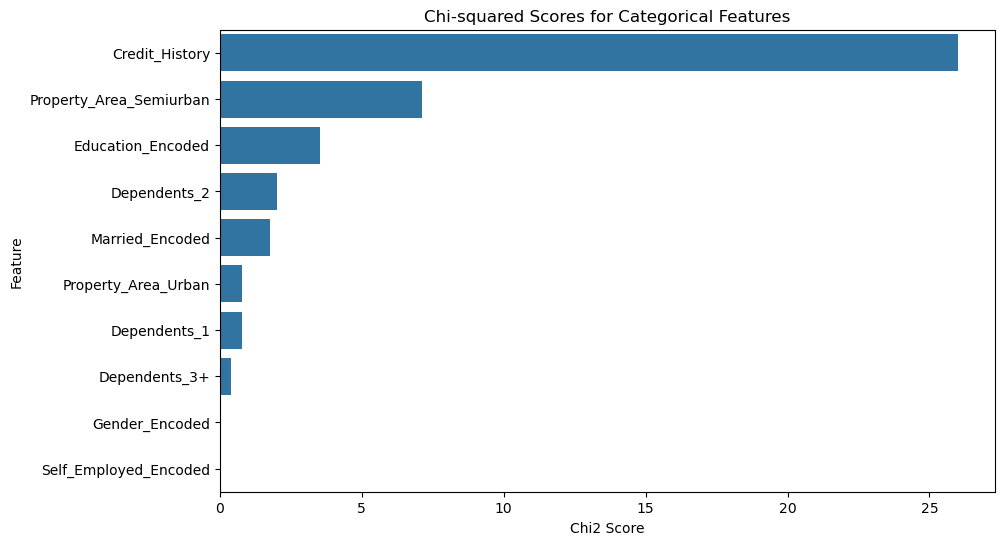

In [32]:
# Visualize Chi-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results)
plt.title('Chi-squared Scores for Categorical Features')
plt.show()

In [33]:
# 1.2 T-test for numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                      'Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_LoanAmount',
                      'Total_Income', 'Log_Total_Income', 'EMI', 'Debt_Income_Ratio']
ttest_results = []
for feature in numerical_features:
    approved = train_set[train_set['Loan_Status_Encoded'] == 1][feature]
    not_approved = train_set[train_set['Loan_Status_Encoded'] == 0][feature]
    t_stat, p_val = ttest_ind(approved, not_approved, nan_policy='omit')
    ttest_results.append({'Feature': feature, 'T-statistic': t_stat, 'P-value': p_val})

ttest_df = pd.DataFrame(ttest_results).sort_values(by='P-value')
print("\nT-test Results for Numerical Features:")
print(ttest_df)


T-test Results for Numerical Features:
                  Feature  T-statistic   P-value
10      Debt_Income_Ratio    -2.138952  0.032835
5   Log_CoapplicantIncome     1.501746  0.133678
1       CoapplicantIncome    -1.466785  0.142948
6          Log_LoanAmount    -0.946736  0.344147
2              LoanAmount    -0.822129  0.411324
7            Total_Income    -0.773975  0.439245
3        Loan_Amount_Term    -0.557973  0.577067
9                     EMI    -0.290868  0.771251
4     Log_ApplicantIncome     0.271116  0.786393
8        Log_Total_Income     0.178910  0.858067
0         ApplicantIncome    -0.116508  0.907288


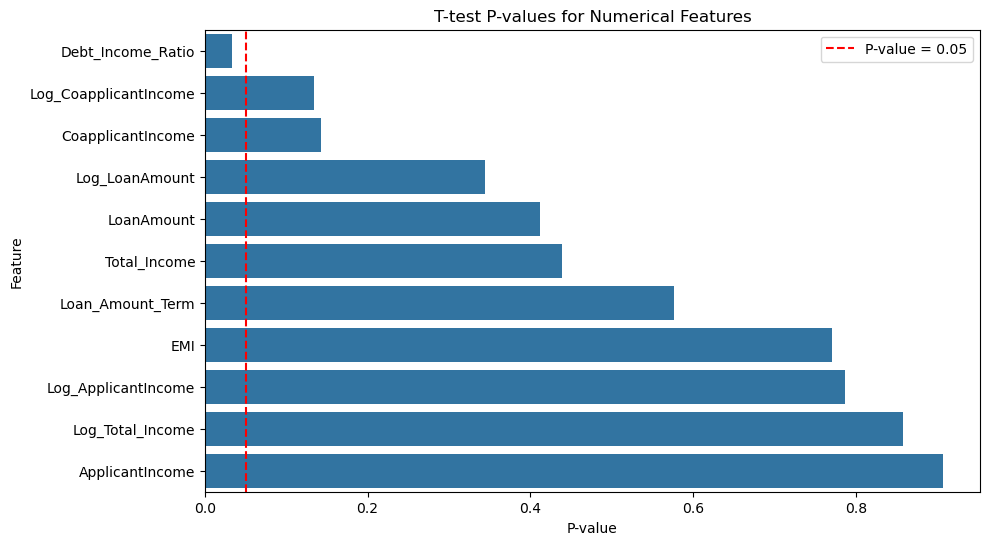

In [34]:
# Visualize T-test p-values
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Feature', data=ttest_df)
plt.axvline(x=0.05, color='red', linestyle='--', label='P-value = 0.05')
plt.title('T-test P-values for Numerical Features')
plt.legend()
plt.show()

In [35]:
# --- Step 2: Feature Importance using Random Forest ---

# Train Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [36]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)


Random Forest Feature Importance:
                    Feature  Importance
4            Credit_History    0.245170
11        Debt_Income_Ratio    0.085407
8              Total_Income    0.072773
9          Log_Total_Income    0.069287
5       Log_ApplicantIncome    0.068161
0           ApplicantIncome    0.066045
10                      EMI    0.063459
2                LoanAmount    0.060175
7            Log_LoanAmount    0.059974
6     Log_CoapplicantIncome    0.041634
1         CoapplicantIncome    0.041431
3          Loan_Amount_Term    0.022701
19  Property_Area_Semiurban    0.016605
13          Married_Encoded    0.015241
14        Education_Encoded    0.013231
16             Dependents_1    0.011370
20      Property_Area_Urban    0.011262
12           Gender_Encoded    0.010780
15    Self_Employed_Encoded    0.009227
17             Dependents_2    0.008391
18            Dependents_3+    0.007673


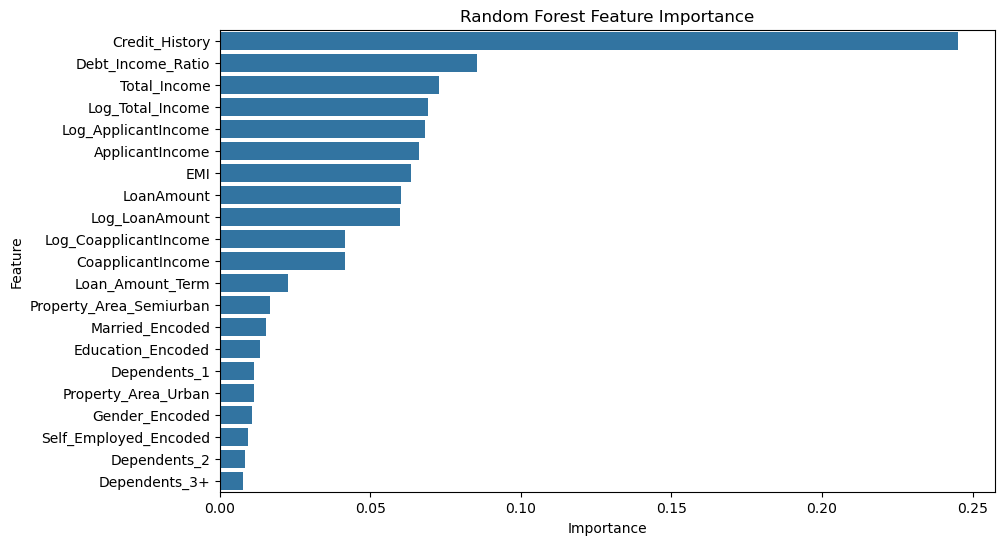

In [37]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [38]:
# --- Step 3: Dimensionality Reduction with PCA ---

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

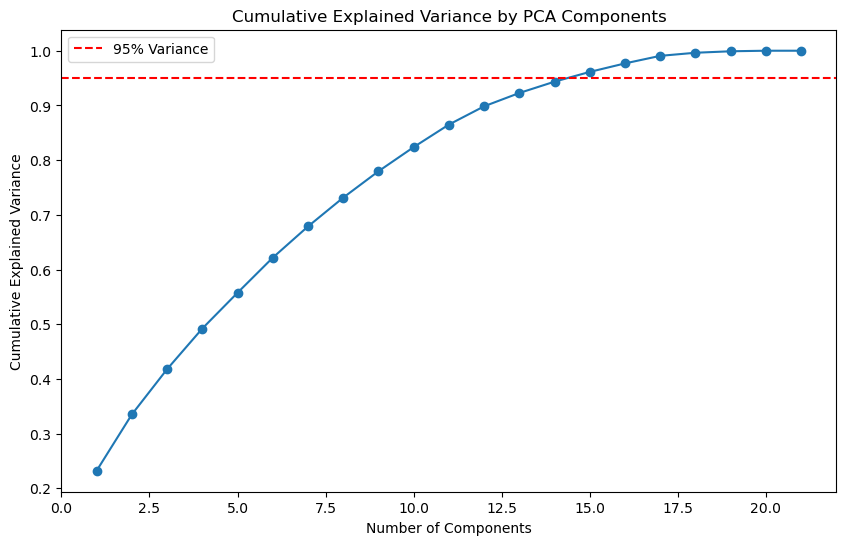

In [41]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

In [74]:
# Select number of components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of PCA components to retain 95% variance: {n_components}")


Number of PCA components to retain 95% variance: 15


In [75]:
# Apply PCA with selected components
pca = PCA(n_components=n_components)
X_pca_selected = pca.fit_transform(X_scaled)

In [76]:
# --- Step 4: Select Top Features ---

# Combine results: Select top features from Chi-squared, T-test, and Random Forest
top_categorical = chi2_results[chi2_results['P-value'] < 0.05]['Feature'].tolist()
top_numerical = ttest_df[ttest_df['P-value'] < 0.05]['Feature'].tolist()
top_rf = feature_importance.head(5)['Feature'].tolist()

selected_features = list(set(top_categorical + top_numerical + top_rf))
print("\nSelected Features:")
print(selected_features)


Selected Features:
['Log_Total_Income', 'Log_ApplicantIncome', 'Credit_History', 'Property_Area_Semiurban', 'Debt_Income_Ratio', 'Total_Income']


In [73]:
# Filter dataset with selected features
train_set_selected = train_set[['Loan_ID', 'Loan_Status', 'Loan_Status_Encoded'] + selected_features]

# Model Enhancement and Tuning

## Hyperparameter Tuning

In [46]:
# Define features and target
X = train_set_selected.drop(['Loan_ID', 'Loan_Status', 'Loan_Status_Encoded'], axis=1)
y = train_set_selected['Loan_Status_Encoded']

In [47]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# --- Step 1: Hyperparameter Tuning for Random Forest ---

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

In [50]:
# Perform Grid Search with 5-fold cross-validation
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                              cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [51]:
# Get best parameters and score
print("\nRandom Forest Best Parameters:")
print(rf_grid_search.best_params_)
print("Random Forest Best F1 Score (CV):", rf_grid_search.best_score_)


Random Forest Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Best F1 Score (CV): 0.8639071861774651


In [52]:
# Evaluate on validation set
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_val)
y_pred_proba_rf = rf_best.predict_proba(X_val)[:, 1]

rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_f1 = f1_score(y_val, y_pred_rf)
rf_roc_auc = roc_auc_score(y_val, y_pred_proba_rf)

print("\nRandom Forest Validation Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Validation Performance:
Accuracy: 0.8780
F1 Score: 0.9153
ROC-AUC: 0.8709

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        38
           1       0.88      0.95      0.92        85

    accuracy                           0.88       123
   macro avg       0.88      0.83      0.85       123
weighted avg       0.88      0.88      0.87       123



In [53]:
# --- Step 2: Hyperparameter Tuning for Logistic Regression ---

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [54]:
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [55]:
# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)# Initialize Logistic Regression model

In [56]:
# Perform Grid Search with 5-fold cross-validation
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, 
                              cv=5, scoring='f1', n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=1)

In [57]:
# Get best parameters and score
print("\nLogistic Regression Best Parameters:")
print(lr_grid_search.best_params_)
print("Logistic Regression Best F1 Score (CV):", lr_grid_search.best_score_)


Logistic Regression Best Parameters:
{'C': 0.01, 'solver': 'liblinear'}
Logistic Regression Best F1 Score (CV): 0.8699456484348126


In [58]:
# Evaluate on validation set
lr_best = lr_grid_search.best_estimator_
y_pred_lr = lr_best.predict(X_val_scaled)
y_pred_proba_lr = lr_best.predict_proba(X_val_scaled)[:, 1]

lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_f1 = f1_score(y_val, y_pred_lr)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba_lr)

print("\nLogistic Regression Validation Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr))


Logistic Regression Validation Performance:
Accuracy: 0.8537
F1 Score: 0.9032
ROC-AUC: 0.8972

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [59]:
# --- Step 3: Visualize Model Performance ---

# Compare model performance
performance_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lr_accuracy],
    'F1 Score': [rf_f1, lr_f1],
    'ROC-AUC': [rf_roc_auc, lr_roc_auc]
})

In [60]:
# Melt the dataframe for visualization
performance_melted = performance_metrics.melt(id_vars='Model', 
                                             value_vars=['Accuracy', 'F1 Score', 'ROC-AUC'],
                                             var_name='Metric', value_name='Score')

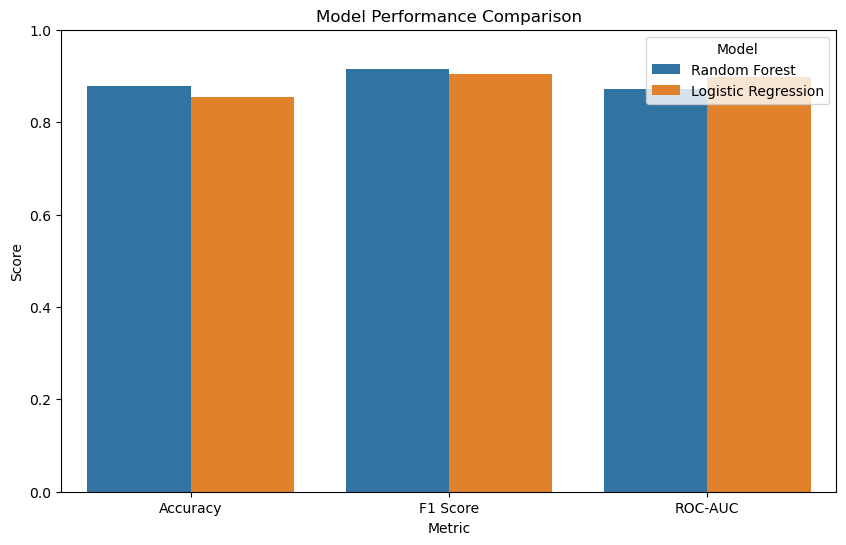

In [61]:
# Plot performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

## Cross-Validation & Regularization

In [62]:
# --- Step 1: Cross-Validation ---

# Function to compute cross-validated metrics
def evaluate_cv_model(model, X, y, model_name, scaler=None):
    # If scaler is provided (for Logistic Regression), scale the data
    if scaler is not None:
        X = scaler.transform(X)
    
    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_roc_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    
    # Store results
    results = {
        'Model': model_name,
        'CV Accuracy Mean': np.mean(cv_accuracy),
        'CV Accuracy Std': np.std(cv_accuracy),
        'CV F1 Score Mean': np.mean(cv_f1),
        'CV F1 Score Std': np.std(cv_f1),
        'CV ROC-AUC Mean': np.mean(cv_roc_auc),
        'CV ROC-AUC Std': np.std(cv_roc_auc)
    }
    return results

In [63]:
# Evaluate Random Forest with cross-validation
rf_cv_results = evaluate_cv_model(rf_best, X_train, y_train, 'Random Forest')

In [64]:
# Evaluate Logistic Regression with cross-validation
lr_cv_results = evaluate_cv_model(lr_best, X_train, y_train, 'Logistic Regression', scaler=scaler)

In [65]:
# Combine results into a DataFrame
cv_results_df = pd.DataFrame([rf_cv_results, lr_cv_results])
print("\nCross-Validation Results:")
print(cv_results_df)


Cross-Validation Results:
                 Model  CV Accuracy Mean  CV Accuracy Std  CV F1 Score Mean  \
0        Random Forest          0.794331         0.032281          0.863907   
1  Logistic Regression          0.798371         0.011858          0.869946   

   CV F1 Score Std  CV ROC-AUC Mean  CV ROC-AUC Std  
0         0.020408         0.747827        0.025834  
1         0.006951         0.721449        0.065377  


In [66]:
# --- Step 2: Regularization for Logistic Regression (L1 vs. L2) ---

# Test Logistic Regression with L1 and L2 regularization
lr_l1 = LogisticRegression(C=lr_best.get_params()['C'], solver='liblinear', penalty='l1', 
                           random_state=42, max_iter=1000)
lr_l2 = LogisticRegression(C=lr_best.get_params()['C'], solver='liblinear', penalty='l2', 
                           random_state=42, max_iter=1000)

In [67]:
# Fit models on scaled training data
lr_l1.fit(scaler.transform(X_train), y_train)
lr_l2.fit(scaler.transform(X_train), y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [68]:
# Evaluate L1 and L2 on validation set
y_pred_l1 = lr_l1.predict(scaler.transform(X_val))
y_pred_proba_l1 = lr_l1.predict_proba(scaler.transform(X_val))[:, 1]
y_pred_l2 = lr_l2.predict(scaler.transform(X_val))
y_pred_proba_l2 = lr_l2.predict_proba(scaler.transform(X_val))[:, 1]

l1_results = {
    'Model': 'Logistic Regression (L1)',
    'Val Accuracy': accuracy_score(y_val, y_pred_l1),
    'Val F1 Score': f1_score(y_val, y_pred_l1),
    'Val ROC-AUC': roc_auc_score(y_val, y_pred_proba_l1)
}
l2_results = {
    'Model': 'Logistic Regression (L2)',
    'Val Accuracy': accuracy_score(y_val, y_pred_l2),
    'Val F1 Score': f1_score(y_val, y_pred_l2),
    'Val ROC-AUC': roc_auc_score(y_val, y_pred_proba_l2)
}

In [69]:
# Combine L1 and L2 results
regularization_results_df = pd.DataFrame([l1_results, l2_results])
print("\nLogistic Regression Regularization Results (Validation Set):")
print(regularization_results_df)


Logistic Regression Regularization Results (Validation Set):
                      Model  Val Accuracy  Val F1 Score  Val ROC-AUC
0  Logistic Regression (L1)      0.853659      0.903226     0.770433
1  Logistic Regression (L2)      0.853659      0.903226     0.897214


In [84]:
# --- Step 3: Check for Overfitting ---

# Function to compare train vs. validation performance
def check_overfitting(model, X_train, X_val, y_train, y_val, model_name, scaler=None):
    # If scaler is provided (for Logistic Regression), scale the data
    if scaler is not None:
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

    # Training performance
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba)

    # Validation performance
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    
    return {
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Val Accuracy': val_accuracy,
        'Train F1 Score': train_f1,
        'Val F1 Score': val_f1,
        'Train ROC-AUC': train_roc_auc,
        'Val ROC-AUC': val_roc_auc
    }

In [85]:
# Check overfitting for Random Forest
rf_overfit_results = check_overfitting(rf_best, X_train, X_val, y_train, y_val, 'Random Forest')

In [86]:
# Check overfitting for Logistic Regression
lr_overfit_results = check_overfitting(lr_best, X_train, X_val, y_train, y_val, 
                                      'Logistic Regression', scaler=scaler)

In [87]:
# Combine overfitting results
overfit_results_df = pd.DataFrame([rf_overfit_results, lr_overfit_results])
print("\nTrain vs. Validation Performance (Overfitting Check):")
print(overfit_results_df)


Train vs. Validation Performance (Overfitting Check):
                 Model  Train Accuracy  Val Accuracy  Train F1 Score  \
0        Random Forest        0.849287      0.878049        0.899183   
1  Logistic Regression        0.798371      0.853659        0.869908   

   Val F1 Score  Train ROC-AUC  Val ROC-AUC  
0      0.915254       0.969960     0.870898  
1      0.903226       0.745289     0.897214  


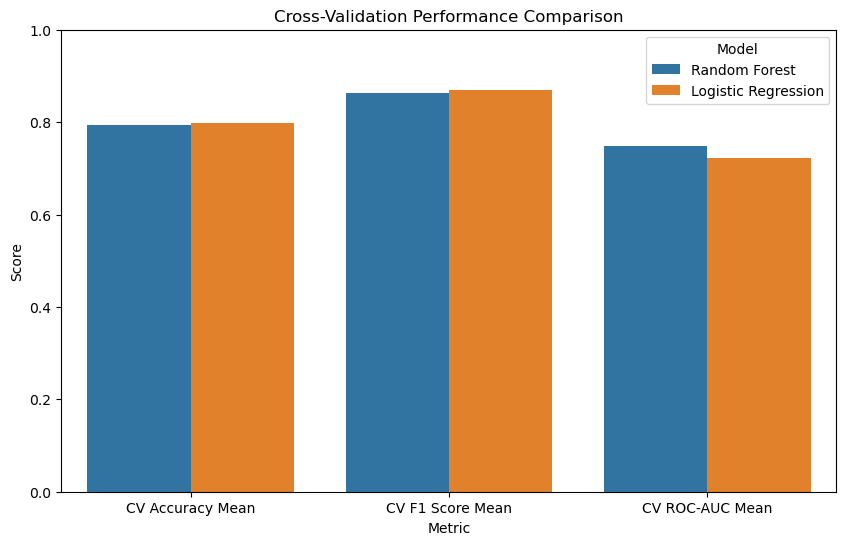

In [88]:
# --- Step 4: Visualize Results ---

# Visualize cross-validation results (from previous step)
cv_melted = cv_results_df.melt(id_vars='Model', 
                               value_vars=['CV Accuracy Mean', 'CV F1 Score Mean', 'CV ROC-AUC Mean'],
                               var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=cv_melted)
plt.title('Cross-Validation Performance Comparison')
plt.ylim(0, 1)
plt.show()

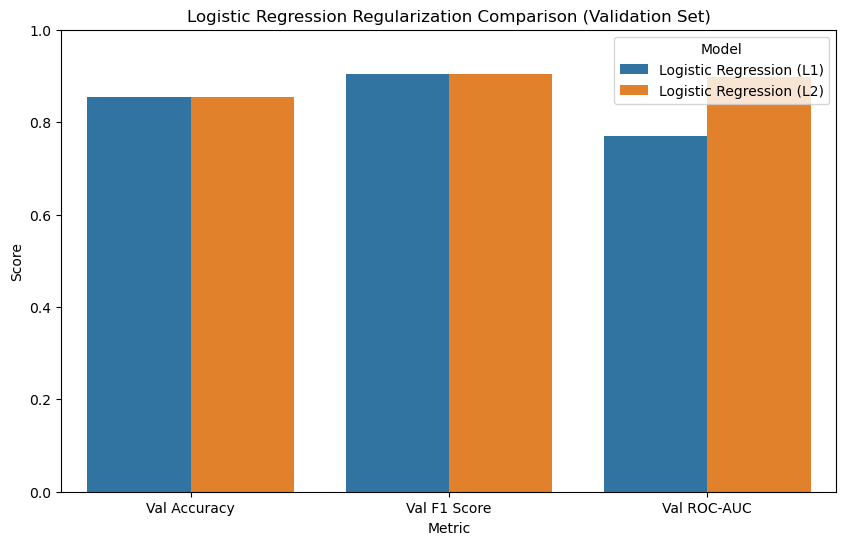

In [89]:
# Visualize regularization results (from previous step)
reg_melted = regularization_results_df.melt(id_vars='Model', 
                                           value_vars=['Val Accuracy', 'Val F1 Score', 'Val ROC-AUC'],
                                           var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=reg_melted)
plt.title('Logistic Regression Regularization Comparison (Validation Set)')
plt.ylim(0, 1)
plt.show()

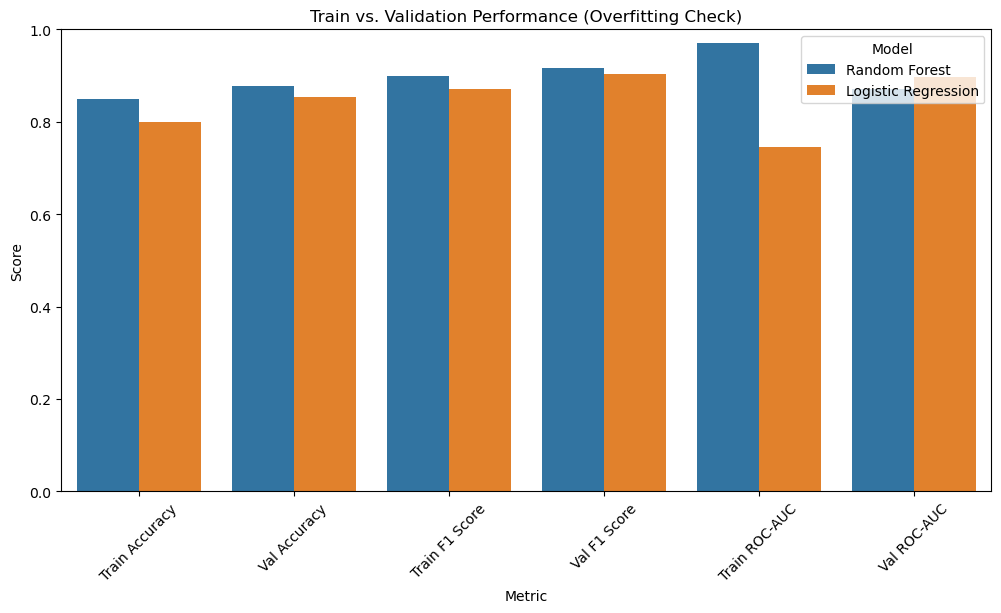

In [90]:
# Visualize overfitting check
overfit_melted = overfit_results_df.melt(id_vars='Model', 
                                         value_vars=['Train Accuracy', 'Val Accuracy', 
                                                     'Train F1 Score', 'Val F1 Score', 
                                                     'Train ROC-AUC', 'Val ROC-AUC'],
                                         var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=overfit_melted)
plt.title('Train vs. Validation Performance (Overfitting Check)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## Model Architecture Adjustments

In [91]:
# --- Step 1: Neural Network Model ---

# Scale features for Neural Network
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [92]:
# Function to build neural network
def build_nn_model(units=64, layers=2, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    for _ in range(layers - 1):
        model.add(Dense(units // 2, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [93]:
# Define parameter grid for Neural Network
nn_param_grid = [
    {'units': 32, 'layers': 1, 'dropout_rate': 0.3},
    {'units': 64, 'layers': 2, 'dropout_rate': 0.3},
    {'units': 128, 'layers': 2, 'dropout_rate': 0.5}
]

In [94]:
# Train and evaluate Neural Network models
nn_results = []
for params in nn_param_grid:
    nn_model = build_nn_model(params['units'], params['layers'], params['dropout_rate'])
    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, 
                 validation_data=(X_val_scaled, y_val))
    
    # Evaluate on validation set
    y_pred_proba_nn = nn_model.predict(X_val_scaled, verbose=0)
    y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)
    
    nn_accuracy = accuracy_score(y_val, y_pred_nn)
    nn_f1 = f1_score(y_val, y_pred_nn)
    nn_roc_auc = roc_auc_score(y_val, y_pred_proba_nn)
    
    nn_results.append({
        'Model': f"NN (units={params['units']}, layers={params['layers']}, dropout={params['dropout_rate']})",
        'Val Accuracy': nn_accuracy,
        'Val F1 Score': nn_f1,
        'Val ROC-AUC': nn_roc_auc
    })

C:\Users\smriti\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\smriti\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\smriti\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_reg

In [95]:
# Select best Neural Network based on F1 Score
nn_results_df = pd.DataFrame(nn_results)
best_nn_idx = nn_results_df['Val F1 Score'].idxmax()
best_nn_params = nn_results_df.iloc[best_nn_idx]
print("\nNeural Network Results (Validation Set):")
print(nn_results_df)
print("\nBest Neural Network Parameters:")
print(best_nn_params)


Neural Network Results (Validation Set):
                                   Model  Val Accuracy  Val F1 Score  \
0   NN (units=32, layers=1, dropout=0.3)      0.869919      0.913043   
1   NN (units=64, layers=2, dropout=0.3)      0.886179      0.923077   
2  NN (units=128, layers=2, dropout=0.5)      0.886179      0.923077   

   Val ROC-AUC  
0     0.900000  
1     0.873065  
2     0.888235  

Best Neural Network Parameters:
Model           NN (units=64, layers=2, dropout=0.3)
Val Accuracy                                0.886179
Val F1 Score                                0.923077
Val ROC-AUC                                 0.873065
Name: 1, dtype: object


In [96]:
# --- Step 2: Compare All Models ---

# Combine validation results (Random Forest, Logistic Regression, Neural Network)
val_results = pd.DataFrame([
    {'Model': 'Random Forest', 'Val Accuracy': accuracy_score(y_val, rf_best.predict(X_val)),
     'Val F1 Score': f1_score(y_val, rf_best.predict(X_val)),
     'Val ROC-AUC': roc_auc_score(y_val, best.predict_proba(X_val)[:, 1])},
    {'Model': 'Logistic Regression', 'Val Accuracy': accuracy_score(y_val, lr_best.predict(scaler.transform(X_val))),
     'Val F1 Score': f1_score(y_val, lr_best.predict(scaler.transform(X_val))),
     'Val ROC-AUC': roc_auc_score(y_val, lr_best.predict_proba(scaler.transform(X_val))[:, 1])},
    best_nn_params
])

print("\nAll Models Validation Performance:")
print(val_results)

NameError: name 'best' is not defined

In [ ]:
# --- Step 3: Visualize Model Comparison ---

# Melt validation results for visualization
val_melted = val_results.melt(id_vars='Model', 
                              value_vars=['Val Accuracy', 'Val F1 Score', 'Val ROC-AUC'],
                              var_name='Metric', value_name='Score')

In [ ]:
# Plot validation performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=val_melted)
plt.title('Model Performance Comparison (Validation Set)')
plt.ylim(0, 1)
plt.show()